In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm

path = "/raid/elhamod/CUB/official/CUB_200_2011/"
images_subfoler = os.path.join(path,"images")
fileName_imgLabel = os.path.join(path,"image_class_labels.txt")
fileName_train_test = os.path.join(path,"train_test_split.txt")
fileName_imageName = os.path.join(path,"images.txt")

df = pd.read_csv(fileName_imgLabel,delimiter=' ', header=None, names=['sample_id', 'label']).set_index('sample_id')
df = df.apply(pd.to_numeric, errors='coerce')

df.sort_values(['label'])
df['label'].value_counts()


199    60
154    60
51     60
35     60
27     60
       ..
105    49
8      48
18     45
5      44
6      41
Name: label, Length: 200, dtype: int64

Text(0.5, 1.0, '# images per species')

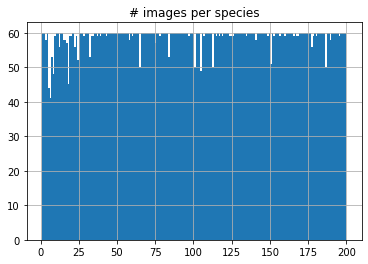

In [2]:
df['label'].hist(bins=200)
plt.title('# images per species')

In [3]:
df2 = pd.read_csv(fileName_train_test,delimiter=' ', header=None, names=['sample_id', 'split']).set_index('sample_id')
df2 = df2.apply(pd.to_numeric, errors='coerce')
              
dfjoined = df2.join(df)

In [4]:
dfjoined[dfjoined['split'] == 1]['label'].value_counts()


199    30
97     30
89     30
85     30
81     30
       ..
135    29
126    29
107    29
196    29
141    29
Name: label, Length: 200, dtype: int64

Text(0.5, 1.0, '# images per species for train')

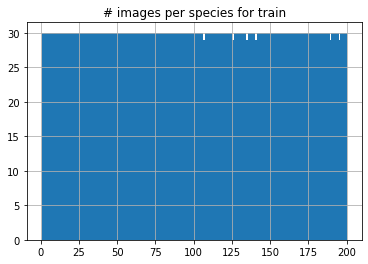

In [5]:
dfjoined[dfjoined['split'] == 1]['label'].hist(bins=200)
plt.title('# images per species for train')

Text(0.5, 1.0, '# images per species for test')

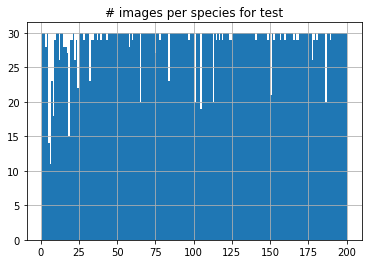

In [6]:
dfjoined[dfjoined['split'] == 0]['label'].hist(bins=200)
plt.title('# images per species for test')

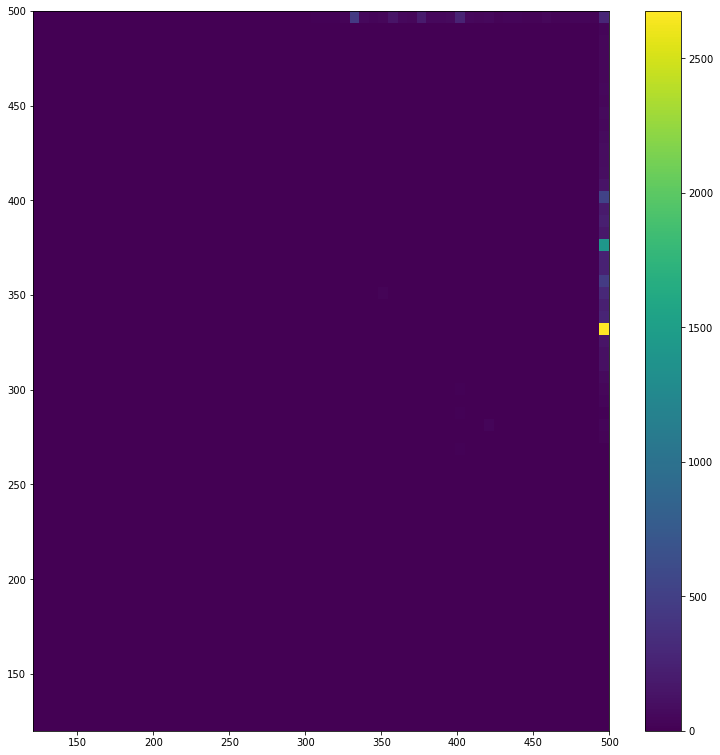

In [7]:
import PIL
from PIL import Image

img_count = len(dfjoined.index)

df3 = df = pd.read_csv(fileName_imageName,delimiter=' ', header=None, names=['sample_id', 'imgName']).set_index('sample_id')
dfjoined = dfjoined.join(df3)


# Get image sizes
width=[]
height=[]
for indx, row in tqdm(dfjoined.iterrows()): 
    image = PIL.Image.open(os.path.join(images_subfoler, row['imgName']))
    w, h = image.size
    width.append(w)
    height.append(h)

# plot histogram
plt.figure(figsize=(10, 10))
plt.hist2d(width, height, bins=60)
plt.subplots_adjust(bottom=0, top=1, left=0, right=1)
plt.colorbar()
plt.show()